# Value Iteration for the Gambler's Problem

Exercise 4.8

### In this notebook, we cover the implementation of value iteration for the gambler's problem

This environment is episodic, and stochastic. The state is the amount of money the gambler has, and the available actions are to bet a certain amount of money. With some fixed percentage, the gambler will win and receive the amount of money bet, and otherwise loses the amount of money bet. The gambler's capital is between 1 and 99 dollars. The episode wins when the gambler has 0 or 100 dollars. Reward is zero on all transitions except those in which the gambler reaches \$100. Since this is episodic, we use no discount $\gamma$, so you won't see it in the code.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
np.set_printoptions(precision=4, suppress=True)

In [44]:
# Set up the reward and transition functions
def step(capital, bet, p):
    r = np.random.rand()
    done = False
    reward = 0
    if r < p:
        reward = 1
        capital += bet
    else:
        capital -= bet
        
    if capital >= 100:
        done = True
        
    return capital, reward, done

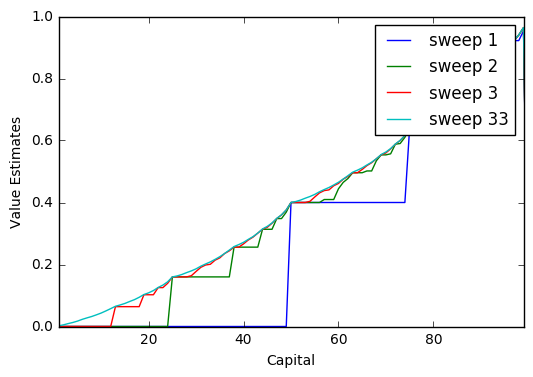

In [65]:
converged = False
p = 0.4
capital = np.random.randint(0, 100)
V = np.zeros(101)
iters = 0
Vs = []

while not converged:
    # sweep over states and update the value function
    delta = 0
    for s in range(1, 100):
        # update the value of state s
        max_bet = min(s, 100 - s)
        Qs = np.zeros(max_bet + 1)
        for a in range(1, max_bet + 1):
            # reward of winning and losing weighted by p and (1 - p)
            # the addition of these two conditions represents the sum of s' in Eq 4.10
            win_capital = s + a
            lose_capital = s - a
            lose_reward = 0 # works cuz episode ends when this happens so reward is limited
            win_reward = 1 if win_capital == 100 else 0
            q = p * (win_reward + V[win_capital]) + (1 - p) * (lose_reward + V[lose_capital])
            Qs[a] = q
        v = V[s]
        V[s] = np.max(Qs)
        delta = max(delta, abs(V[s] - v))
        
    Vs.append(V.copy())
    iters += 1
    
    if delta == 0:
        converged = True
        
# Show graphs of value estimates
plt.xlabel("Capital")
plt.ylabel("Value Estimates")
plt.subplot(111)
axes = plt.gca()
axes.set_xlim([1, 99])
axes.set_ylim([0, 1])

plt.plot(Vs[0], label="sweep 1")
plt.plot(Vs[1], label="sweep 2")
plt.plot(Vs[2], label="sweep 3")
plt.plot(Vs[iters - 1], label="sweep {}".format(iters))
plt.legend()
    
plt.show()

### Now the Final Policy

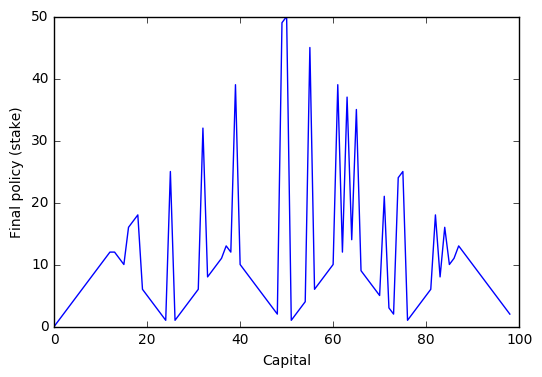

In [64]:
pi = np.ndarray(99)

for s in range(1, 99):
    max_bet = min(s, 100 - s)
    Qs = np.zeros(max_bet + 1)
    for a in range(1, max_bet + 1):
        # reward of winning and losing weighted by p and (1 - p)
        # the addition of these two conditions represents the sum of s' in Eq 4.10
        win_capital = s + a
        lose_capital = s - a
        lose_reward = 0 # works cuz episode ends when this happens so reward is limited
        win_reward = 1 if win_capital == 100 else 0
        q = p * (win_reward + V[win_capital]) + (1 - p) * (lose_reward + V[lose_capital])
        Qs[a] = q
    best_a = np.argmax(Qs)
    pi[s] = best_a
    
plt.plot(pi)
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.show()